In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 10 18:55:32 2020

@author: Carlos
"""

"""
This script uses the UNCOMTRADE
API to retrieve international trade
data into a Pandas DataFrame
Author: Carlos Góes
www.carlosgoes.com
"""

def comtrade(reporter,partner,year,freq,commoditycode):
    #Import your libraries
    import json
    import urllib
    import pandas as pd
    import ssl
    
    #Import the index of countries
    partnerurl = 'https://comtrade.un.org/data/cache/partnerAreas.json'
    ctx = ssl.create_default_context()
    ctx.check_hostname = False
    ctx.verify_mode = ssl.CERT_NONE
    areas = urllib.request.urlopen(partnerurl, context=ctx)
    data = json.loads(areas.read())
    data = data['results']
    index = {}
    for i in range(len(data)):
        upper = data[i]['text']
        lower = upper.lower()
        index.update({lower: data[i]['id']})
    
    #Retrieve numeric codes for reporter and partner
    reporter = index[str(reporter)]
    partner =  index[str(partner)]
    
    #Set the URL API
    url = 'http://comtrade.un.org/api/get?' + \
        'max=100000&' + \
        'type=C&' + \
        'freq=' + str(freq) + '&' + \
        'px=HS&' + \
        'ps=' + str(year) + '&' + \
        'r=' + reporter + '&' + \
        'p=' + partner + '&' + \
        'rg=all&' + \
        'cc=' + commoditycode + '&' + \
        'fmt=json'
    
    #Import data with the API, transform JSON into a frame
    urlopen = urllib.request.urlopen(url, context=ctx)
    data = json.loads(urlopen.read())
    data = pd.io.json.json_normalize(data['dataset'])
    
    #Return the data
    return data

def code_retriever():
    import pandas as pd
    frame = pd.read_json('https://comtrade.un.org/data/cache/partnerAreas.json')
    countries = [i['text'].lower() for i in frame['results']]
    return countries
    
def country_retriever(reporter, partner, year, freq, ccode, agg):
    return comtrade(reporter, partner, year, freq, ccode)

def product_number(frame):
    frame = frame[ frame['aggrLevel'] == 6 ] #6-digit HS codes
    frame = frame[ frame['rgCode'] == 2 ] # exports
    return (frame['TradeValue'] > 0).size    

In [2]:
#############

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH = r'C:\Users\Carlos\OneDrive - UC San Diego\UCSD\Research\Trade, Ideas and Productivity\code'

year = 2010
partner = 'world'
freq = 'A'
ccode = 'all'
wait_time = 0

countries = code_retriever()
countries = countries[2:]

n_of_products = dict()
for country in countries:
    print(country)
    try:
        frame = country_retriever(country, partner, year, freq, ccode, 6)
    except:
        frame = pd.DataFrame()

    if (frame.size == 0):
        time.sleep(wait_time)
        pass
    
    else:
        products = product_number(frame)
        n_of_products.update({country: products})
        time.sleep(wait_time)

pd.DataFrame.from_dict(n_of_products, orient='index').to_csv(PATH + '//' + str(year) + '.csv')

P = np.sort([n_of_products[i] for i in n_of_products.keys()])

afghanistan
africa cameu region, nes
albania
algeria
american samoa
andorra
angola
anguilla
antarctica
antigua and barbuda
areas, nes
argentina
armenia
aruba
australia
austria
azerbaijan
bahamas
bahrain
bangladesh
barbados
belarus
belgium
belgium-luxembourg
belize
benin
bermuda
bhutan
bolivia (plurinational state of)
bonaire
bosnia herzegovina
botswana
bouvet island
br. antarctic terr.
br. indian ocean terr.
br. virgin isds
brazil
brunei darussalam
bulgaria
bunkers
burkina faso
burundi
cabo verde
cacm, nes
cambodia
cameroon
canada
caribbean, nes
cayman isds
central african rep.
chad
chile
china
china, hong kong sar
china, macao sar
christmas isds
cocos isds
colombia
comoros
congo
cook isds
costa rica
côte d'ivoire
croatia
cuba
curaçao
cyprus
czechia
czechoslovakia
dem. people's rep. of korea
dem. rep. of the congo
denmark
djibouti
dominica
dominican rep.
east and west pakistan
eastern europe, nes
ecuador
egypt
el salvador
equatorial guinea
eritrea
estonia
ethiopia
europe efta, nes
euro

<Figure size 1000x500 with 1 Axes>

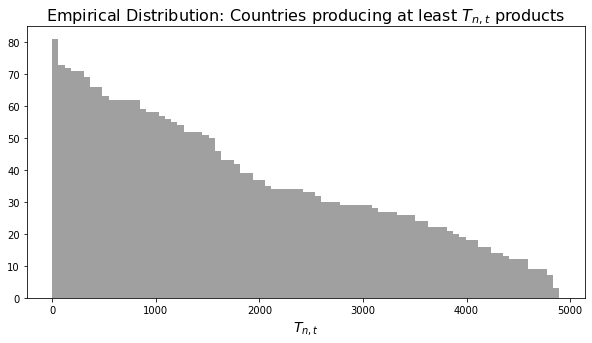

In [3]:
%matplotlib inline

fig, ax = plt.subplots(1, figsize=(10,5))
plt.hist(P,
         bins=P.size,
         density=False,
         cumulative=-1,
         facecolor='grey', 
         alpha=0.75) 
plt.xlabel('$T_{n,t}$', fontsize=14) 
plt.title('Empirical Distribution: Countries producing at least $T_{n,t}$ products', fontsize=16)
plt.show()